In [158]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pycaret.regression import *

In [354]:
df = pd.read_excel('data_preprocess\export-pm25_eng-1h.xlsx')
# df.to_csv("data_preprocess/export-pm25-1h.csv", index=False)

In [355]:
# df = pd.read_csv("data_preprocess/export-pm25-1h.csv")
df.head()

,Unnamed: 0,timestamp,timezone,humidity,pm_10,pm_2_5,pm_2_5_sp,temperature
0,0,2023-03-31 22:00:00,Asia/Bangkok,62.659563,4.727273,4.727273,4.727273,27.147784
1,1,2023-04-02 18:00:00,Asia/Bangkok,69.995698,7.857143,7.142857,7.142857,32.246966
2,2,2023-04-02 19:00:00,Asia/Bangkok,65.608215,8.400000,7.800000,7.800000,32.518829
3,3,2023-04-02 20:00:00,Asia/Bangkok,65.489705,8.750000,8.266667,8.266667,31.864227
4,4,2023-04-02 21:00:00,Asia/Bangkok,65.811462,10.316667,9.083333,9.083333,31.412888


In [356]:
df['hour'] = df['timestamp'].dt.hour
df['dayofweek'] = df['timestamp'].dt.dayofweek
df['month'] = df['timestamp'].dt.month
df['day'] = df['timestamp'].dt.day

In [357]:
df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')  # แปลงให้เป็น datetime
df = df.set_index('timestamp')  # ตั้งค่า index เป็น timestamp
df = df.sort_index()  # เรียงลำดับตามเวลาฃ
df

,Unnamed: 0,timezone,humidity,pm_10,pm_2_5,pm_2_5_sp,temperature,hour,dayofweek,month,day
timestamp,,,,,,,,,,,
2023-03-31 22:00:00.000,0,Asia/Bangkok,62.659563,4.727273,4.727273,4.727273,27.147784,22,4,3,31
2023-04-02 18:00:00.000,1,Asia/Bangkok,69.995698,7.857143,7.142857,7.142857,32.246966,18,6,4,2
2023-04-02 19:00:00.000,2,Asia/Bangkok,65.608215,8.400000,7.800000,7.800000,32.518829,19,6,4,2
2023-04-02 20:00:00.000,3,Asia/Bangkok,65.489705,8.750000,8.266667,8.266667,31.864227,20,6,4,2
2023-04-02 21:00:00.000,4,Asia/Bangkok,65.811462,10.316667,9.083333,9.083333,31.412888,21,6,4,2
...,...,...,...,...,...,...,...,...,...,...,...
2025-02-11 08:00:00.000,14791,Asia/Bangkok,90.929747,42.294118,37.568627,36.882353,23.684319,8,1,2,11
2025-02-11 09:00:00.000,14792,Asia/Bangkok,83.511569,42.916667,38.800000,41.166667,25.896389,9,1,2,11
2025-02-11 10:00:00.000,14793,Asia/Bangkok,72.046736,27.533333,23.333333,19.466667,28.852626,10,1,2,11


In [358]:
df

,Unnamed: 0,timezone,humidity,pm_10,pm_2_5,pm_2_5_sp,temperature,hour,dayofweek,month,day
timestamp,,,,,,,,,,,
2023-03-31 22:00:00.000,0,Asia/Bangkok,62.659563,4.727273,4.727273,4.727273,27.147784,22,4,3,31
2023-04-02 18:00:00.000,1,Asia/Bangkok,69.995698,7.857143,7.142857,7.142857,32.246966,18,6,4,2
2023-04-02 19:00:00.000,2,Asia/Bangkok,65.608215,8.400000,7.800000,7.800000,32.518829,19,6,4,2
2023-04-02 20:00:00.000,3,Asia/Bangkok,65.489705,8.750000,8.266667,8.266667,31.864227,20,6,4,2
2023-04-02 21:00:00.000,4,Asia/Bangkok,65.811462,10.316667,9.083333,9.083333,31.412888,21,6,4,2
...,...,...,...,...,...,...,...,...,...,...,...
2025-02-11 08:00:00.000,14791,Asia/Bangkok,90.929747,42.294118,37.568627,36.882353,23.684319,8,1,2,11
2025-02-11 09:00:00.000,14792,Asia/Bangkok,83.511569,42.916667,38.800000,41.166667,25.896389,9,1,2,11
2025-02-11 10:00:00.000,14793,Asia/Bangkok,72.046736,27.533333,23.333333,19.466667,28.852626,10,1,2,11


***Clean Data step 1***
1. Drop 'Unnamed: 0' column ; not have impact for model
2. Drop 'timezone' column ; Model use in thailand only\
3. Drop 'pm_10' column ;
4. Drop 'pm_2_5_sp' column ;

In [359]:
df_use = df.drop(columns=["Unnamed: 0", "timezone", "pm_2_5_sp", 'pm_10'], axis=1)
df_use.head()

,humidity,pm_2_5,temperature,hour,dayofweek,month,day
timestamp,,,,,,,
2023-03-31 22:00:00,62.659563,4.727273,27.147784,22,4,3,31
2023-04-02 18:00:00,69.995698,7.142857,32.246966,18,6,4,2
2023-04-02 19:00:00,65.608215,7.800000,32.518829,19,6,4,2
2023-04-02 20:00:00,65.489705,8.266667,31.864227,20,6,4,2
2023-04-02 21:00:00,65.811462,9.083333,31.412888,21,6,4,2


***Clean Data step 2***
1. Check null value and drop row ; cant use mean to instead, that have impact to model
2. Check outlier by boxplot

In [360]:
df_use.isnull().sum()
df_use = df_use.dropna()
df_use.isnull().sum()

humidity       0
pm_2_5         0
temperature    0
hour           0
dayofweek      0
month          0
day            0
dtype: int64

In [361]:
print(df_use['pm_2_5'].describe())
print(df_use['temperature'].describe())
print(df_use['humidity'].describe())

count    14792.000000
mean        21.195190
std         13.094135
min          1.421053
25%         11.233333
50%         18.848870
75%         29.450000
max        184.366667
Name: pm_2_5, dtype: float64
count    14792.000000
mean        29.699716
std          4.760888
min         20.419051
25%         26.383601
50%         28.508779
75%         31.404870
max         52.070282
Name: temperature, dtype: float64
count    14792.000000
mean        78.569546
std         13.272735
min         39.496231
25%         67.330850
50%         80.051360
75%         89.818908
max        100.000000
Name: humidity, dtype: float64


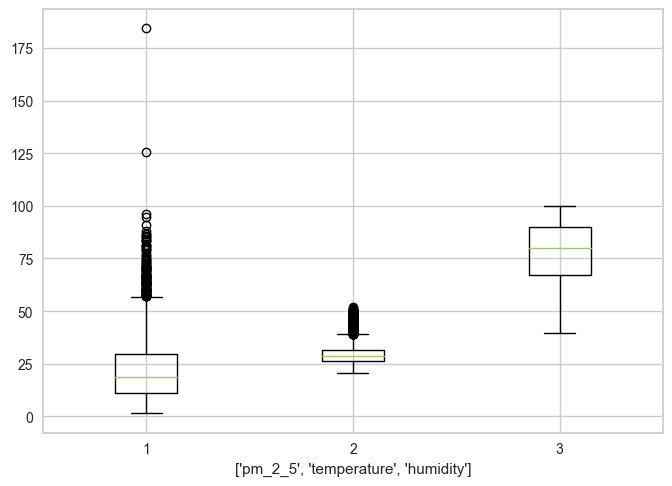

In [362]:
plt.boxplot(df_use[['pm_2_5', 'temperature', 'humidity']])
plt.xlabel(['pm_2_5', 'temperature', 'humidity'])
plt.show()

In [ ]:
# df_use['temperature'] = df_use['temperature'].apply(lambda x: x if x < 36 else np.nan) # remove outliers
# df_use['humidity'] = df_use['humidity'].apply(lambda x: x if x < 100 else np.nan) # remove outliers
# df_use['pm_2_5'] = df_use['pm_2_5'].apply(lambda x: x if x < 55 else np.nan) # remove outliers

In [363]:
df_use.isnull().sum()
df_use = df_use.dropna()
df_use.isnull().sum()

humidity       0
pm_2_5         0
temperature    0
hour           0
dayofweek      0
month          0
day            0
dtype: int64

In [364]:
print(df_use['pm_2_5'].describe())
print(df_use['temperature'].describe())
print(df_use['humidity'].describe())

count    14792.000000
mean        21.195190
std         13.094135
min          1.421053
25%         11.233333
50%         18.848870
75%         29.450000
max        184.366667
Name: pm_2_5, dtype: float64
count    14792.000000
mean        29.699716
std          4.760888
min         20.419051
25%         26.383601
50%         28.508779
75%         31.404870
max         52.070282
Name: temperature, dtype: float64
count    14792.000000
mean        78.569546
std         13.272735
min         39.496231
25%         67.330850
50%         80.051360
75%         89.818908
max        100.000000
Name: humidity, dtype: float64


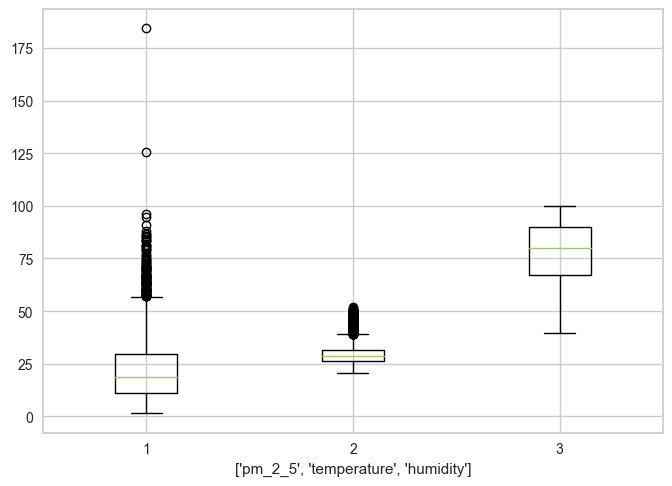

In [342]:
plt.boxplot(df_use[['pm_2_5', 'temperature', 'humidity']])
plt.xlabel(['pm_2_5', 'temperature', 'humidity'])
plt.show()

***Chose feature use to be parametre***
humidity temperature and timestamp

In [365]:
ex = setup(data=df_use, target='pm_2_5', fold=5, train_size=0.8, session_id=123, iterative_imputation_iters=100, remove_outliers = True)

,Description,Value
0,Session id,123
1,Target,pm_2_5
2,Target type,Regression
3,Original data shape,"(14792, 7)"
4,Transformed data shape,"(14200, 7)"
5,Transformed train set shape,"(11241, 7)"
6,Transformed test set shape,"(2959, 7)"
7,Numeric features,6
8,Preprocess,True
9,Imputation type,simple


In [366]:
best_model = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,4.7790,45.9388,6.7727,0.7333,0.3789,0.3877,0.2580
rf,Random Forest Regressor,5.7242,62.4678,7.9014,0.6373,0.4356,0.4719,0.4420
lightgbm,Light Gradient Boosting Machine,6.5778,74.0173,8.6007,0.5703,0.4794,0.5496,0.1540
knn,K Neighbors Regressor,7.2762,96.1963,9.8026,0.4415,0.5235,0.6026,0.0620
gbr,Gradient Boosting Regressor,8.2298,111.5955,10.5620,0.3519,0.5672,0.7048,0.2700
dt,Decision Tree Regressor,7.3138,126.2412,11.2352,0.2665,0.5646,0.5240,0.0620
lar,Least Angle Regression,9.6283,149.7167,12.2348,0.1304,0.6520,0.8786,0.0660
br,Bayesian Ridge,9.6295,149.7159,12.2347,0.1304,0.6521,0.8791,0.0540
ridge,Ridge Regression,9.6283,149.7167,12.2348,0.1304,0.6520,0.8786,0.4280
lr,Linear Regression,9.6283,149.7167,12.2348,0.1304,0.6520,0.8786,0.7240


In [367]:
predict_model(best_model)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,4.3787,39.8579,6.3133,0.7634,0.3591,0.3604


,humidity,temperature,hour,dayofweek,month,day,pm_2_5,prediction_label
timestamp,,,,,,,,
2024-11-18 16:00:00,65.502914,30.803007,16,0,11,18,10.633333,9.178139
2023-09-14 17:00:00,72.327576,31.079021,17,3,9,14,41.083332,18.111574
2024-02-21 00:00:00,88.956573,26.982475,0,2,2,21,14.633333,18.570147
2024-09-27 02:00:00,90.859581,24.976040,2,4,9,27,20.948277,19.998132
2024-04-26 15:00:00,84.172531,30.002304,15,4,4,26,36.116665,30.812758
...,...,...,...,...,...,...,...,...
2023-04-21 06:00:00,69.917198,29.804077,6,4,4,21,36.583332,36.271736
2023-10-21 14:00:00,69.957191,33.257820,14,5,10,21,17.183332,13.739461
2023-10-25 19:00:00,99.886063,25.398525,19,2,10,25,14.683333,17.696041


In [279]:
tuned_model = tune_model(best_model)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,7.9309,98.1202,9.9056,0.3583,0.5536,0.6808
1,7.9473,97.5532,9.8769,0.3599,0.5793,0.7465
2,7.7739,91.7903,9.5807,0.4003,0.5597,0.7131
3,7.8077,92.1027,9.5970,0.3650,0.5621,0.7136
4,8.1076,102.8904,10.1435,0.3400,0.5649,0.7037
Mean,7.9135,96.4914,9.8207,0.3647,0.5639,0.7115
Std,0.1181,4.1494,0.2108,0.0197,0.0085,0.0212


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [373]:
df_test = pd.read_excel('data_preprocess\export-r202_test_nbiot-1h.xlsx')
df_test['hour'] = df_test['timestamp'].dt.hour
df_test['dayofweek'] = df_test['timestamp'].dt.dayofweek
df_test['month'] = df_test['timestamp'].dt.month
df_test['day'] = df_test['timestamp'].dt.day

In [374]:
df_test

,Unnamed: 0,timestamp,timezone,humidity,pm_10,pm_2_5,pm_2_5_sp,temperature,hour,dayofweek,month,day
0,0,2022-08-25 21:00:00,Asia/Bangkok,NaN,1.000000,1.000000,1.000000,NaN,21,3,8,25
1,1,2023-04-09 13:00:00,Asia/Bangkok,60.127563,4.100000,3.500000,3.500000,25.209442,13,6,4,9
2,2,2023-04-09 14:00:00,Asia/Bangkok,52.371216,4.250000,3.916667,3.916667,26.126556,14,6,4,9
3,3,2023-04-09 15:00:00,Asia/Bangkok,51.104058,11.166667,10.944444,10.944444,35.803477,15,6,4,9
4,4,2023-04-09 16:00:00,Asia/Bangkok,50.511863,12.000000,11.590909,11.590909,36.056519,16,6,4,9
...,...,...,...,...,...,...,...,...,...,...,...,...
10108,10108,2024-06-26 12:00:00,Asia/Bangkok,62.034445,47.700000,40.650000,49.483333,32.720980,12,2,6,26
10109,10109,2024-06-26 13:00:00,Asia/Bangkok,57.990636,40.683333,35.633333,39.900000,33.358209,13,2,6,26
10110,10110,2024-06-26 14:00:00,Asia/Bangkok,66.245378,50.116667,42.216667,52.900000,32.688989,14,2,6,26
10111,10111,2024-06-26 15:00:00,Asia/Bangkok,74.005099,57.200000,47.183333,63.933333,31.436409,15,2,6,26


In [375]:
predict_model(best_model, data=df_test)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,6.6948,87.7659,9.3683,0.5481,0.5441,0.7185


,Unnamed: 0,timestamp,timezone,humidity,pm_10,pm_2_5_sp,temperature,hour,dayofweek,month,day,pm_2_5,prediction_label
0,0,2022-08-25 21:00:00,Asia/Bangkok,NaN,1.000000,1.000000,NaN,21,3,8,25,1.000000,16.939599
1,1,2023-04-09 13:00:00,Asia/Bangkok,60.127563,4.100000,3.500000,25.209442,13,6,4,9,3.500000,18.516555
2,2,2023-04-09 14:00:00,Asia/Bangkok,52.371216,4.250000,3.916667,26.126556,14,6,4,9,3.916667,18.402030
3,3,2023-04-09 15:00:00,Asia/Bangkok,51.104057,11.166667,10.944445,35.803478,15,6,4,9,10.944445,13.083307
4,4,2023-04-09 16:00:00,Asia/Bangkok,50.511864,12.000000,11.590909,36.056519,16,6,4,9,11.590909,12.075498
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10108,10108,2024-06-26 12:00:00,Asia/Bangkok,62.034443,47.700001,49.483334,32.720982,12,2,6,26,40.650002,34.215512
10109,10109,2024-06-26 13:00:00,Asia/Bangkok,57.990635,40.683334,39.900002,33.358208,13,2,6,26,35.633335,32.671889
10110,10110,2024-06-26 14:00:00,Asia/Bangkok,66.245377,50.116665,52.900002,32.688988,14,2,6,26,42.216667,37.000158
10111,10111,2024-06-26 15:00:00,Asia/Bangkok,74.005096,57.200001,63.933334,31.436409,15,2,6,26,47.183334,35.341195


In [280]:
df_use

,humidity,pm_2_5,temperature,hour,dayofweek,month,day
timestamp,,,,,,,
2023-03-31 22:00:00.000,62.659563,4.727273,27.147784,22,4,3,31
2023-04-02 18:00:00.000,69.995698,7.142857,32.246966,18,6,4,2
2023-04-02 19:00:00.000,65.608215,7.800000,32.518829,19,6,4,2
2023-04-02 20:00:00.000,65.489705,8.266667,31.864227,20,6,4,2
2023-04-02 21:00:00.000,65.811462,9.083333,31.412888,21,6,4,2
...,...,...,...,...,...,...,...
2025-02-11 08:00:00.000,90.929747,37.568627,23.684319,8,1,2,11
2025-02-11 09:00:00.000,83.511569,38.800000,25.896389,9,1,2,11
2025-02-11 10:00:00.000,72.046736,23.333333,28.852626,10,1,2,11


In [376]:
# กำหนดช่วงเวลาที่ต้องการพยากรณ์ (7 วันข้างหน้า)
future_dates = pd.date_range(start=df_use.index[-1], periods=8, freq='D')[1:]

# สร้าง DataFrame สำหรับพยากรณ์
future_df = pd.DataFrame(index=future_dates)
future_df['hour'] = future_df.index.hour
future_df['dayofweek'] = future_df.index.dayofweek
future_df['month'] = future_df.index.month
future_df['day'] = future_df.index.day

future_df['temperature'] = df_use['temperature'].mean()  # ใช้ค่าเฉลี่ยของอดีต
future_df['humidity'] = df_use['humidity'].mean()



In [377]:
future_df = future_df[df_use.columns.drop('pm_2_5')]  # เรียงตาม df_use (ยกเว้น pm_2_5)

In [378]:
predictions = predict_model(best_model, data=future_df)
print(predictions.head())  # ดูว่ามีคอลัมน์อะไรบ้าง

                         humidity  temperature  hour  dayofweek  month  day  \
2025-02-12 11:15:35.967  78.56955    29.699717    11          2      2   12   
2025-02-13 11:15:35.967  78.56955    29.699717    11          3      2   13   
2025-02-14 11:15:35.967  78.56955    29.699717    11          4      2   14   
2025-02-15 11:15:35.967  78.56955    29.699717    11          5      2   15   
2025-02-16 11:15:35.967  78.56955    29.699717    11          6      2   16   

                         prediction_label  
2025-02-12 11:15:35.967         24.908261  
2025-02-13 11:15:35.967         25.886335  
2025-02-14 11:15:35.967         25.855595  
2025-02-15 11:15:35.967         26.756575  
2025-02-16 11:15:35.967         25.138135  


In [ ]:
df_use['day'].tail(7)

timestamp
2025-02-10 21:00:00.000    10
2025-02-10 22:00:00.000    10
2025-02-11 08:00:00.000    11
2025-02-11 09:00:00.000    11
2025-02-11 10:00:00.000    11
2025-02-11 11:00:00.000    11
2025-02-11 11:15:35.967    11
Name: day, dtype: int32

In [292]:
# ทำนายค่า pm_2_5
future_df['pm_2_5_predicted'] = predict_model(best_model, data=future_df)['prediction_label']
print(future_df)

                          humidity  temperature  hour  dayofweek  month  day  \
2025-02-12 11:15:35.967  79.857066    28.665646    11          2      2   12   
2025-02-13 11:15:35.967  79.857066    28.665646    11          3      2   13   
2025-02-14 11:15:35.967  79.857066    28.665646    11          4      2   14   
2025-02-15 11:15:35.967  79.857066    28.665646    11          5      2   15   
2025-02-16 11:15:35.967  79.857066    28.665646    11          6      2   16   
2025-02-17 11:15:35.967  79.857066    28.665646    11          0      2   17   
2025-02-18 11:15:35.967  79.857066    28.665646    11          1      2   18   

                         pm_2_5_predicted  
2025-02-12 11:15:35.967         25.028077  
2025-02-13 11:15:35.967         24.576360  
2025-02-14 11:15:35.967         25.433015  
2025-02-15 11:15:35.967         23.295956  
2025-02-16 11:15:35.967         24.675885  
2025-02-17 11:15:35.967         21.639523  
2025-02-18 11:15:35.967         19.060358  
